In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob
import os
import scipy.stats as stats
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from utils import *
import matplotlib.pyplot as plt

LOADING DATA


In [ ]:
accel_df = pd.read_csv('data/all_accelerometer_data_pids_13.csv')
accel_df['time'] = pd.to_datetime(accel_df['time'], unit='ms')

In [ ]:
tac_files = glob.glob("clean_tac/*.csv")
tac_data = {}

for file in tac_files:
    pid = os.path.basename(file).split(".")[0] 
    df_tac = pd.read_csv(file)
    df_tac['pid'] = pid  
    tac_data[pid] = df_tac

combined_df = pd.concat(tac_data.values(), ignore_index=True)

print(combined_df.head())


    timestamp  TAC_Reading               pid
0  1493727820     0.000215  DK3500_clean_TAC
1  1493728019     0.001716  DK3500_clean_TAC
2  1493729841     0.001921  DK3500_clean_TAC
3  1493731667     0.000569  DK3500_clean_TAC
4  1493731994    -0.001321  DK3500_clean_TAC


In [ ]:
raw_files = glob.glob('raw_tac/*.xlsx')

raw_list = []

for file in raw_files:
    try:
        raw_temp = pd.read_excel(file, engine="openpyxl", skiprows=0)

        raw_temp = raw_temp.dropna(axis=1, how='all')

        raw_temp.columns = [col if "Unnamed" not in col else f"col_{i}" for i, col in enumerate(raw_temp.columns)]
        raw_list.append(raw_temp)

    except Exception as e:
        print(f"⚠️ Error reading {file}: {e}")

if raw_list:
    raw_df = pd.concat(raw_list, ignore_index=True)
    print(raw_df.head()) 
else:
    print("⚠️ No valid data files found.")


   TAC Level  IR Voltage  Temperature                Time                Date  \
0      0.000       1.203       77.932 2017-05-02 11:16:02 2017-05-02 11:16:02   
1      0.000       1.139       79.792 2017-05-02 11:46:25 2017-05-02 11:46:25   
2      0.000       1.139       81.464 2017-05-02 11:51:49 2017-05-02 11:51:49   
3      0.016       1.139       82.580 2017-05-02 12:22:13 2017-05-02 12:22:13   
4      0.048       1.139       84.996 2017-05-02 12:52:37 2017-05-02 12:52:37   

  col_0 col_1 col_2 col_3 col_4  
0   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN  
4   NaN   NaN   NaN   NaN   NaN  


In [ ]:
raw_df = raw_df.drop(columns=["col_0", "col_1", "col_2", "col_3", "col_4"], errors="ignore")

if "Date" in raw_df.columns and "Time" in raw_df.columns:
    raw_df = raw_df.drop(columns=["Date"])
print(raw_df.head())


   TAC Level  IR Voltage  Temperature                Time
0      0.000       1.203       77.932 2017-05-02 11:16:02
1      0.000       1.139       79.792 2017-05-02 11:46:25
2      0.000       1.139       81.464 2017-05-02 11:51:49
3      0.016       1.139       82.580 2017-05-02 12:22:13
4      0.048       1.139       84.996 2017-05-02 12:52:37


PLOTTING 

In [ ]:
raw_df['Time'] = pd.to_datetime(raw_df['Time'])

raw_df['Full Date'] = raw_df['Time'].dt.strftime('%Y-%m-%d %H:%M:%S')

fig = px.scatter(
    raw_df,
    x='Time',  
    y='TAC Level',  
    color='Temperature',  
    color_continuous_scale='viridis',  
    hover_data={'Full Date': True, 'IR Voltage': True, 'TAC Level': True},  
    title='TAC Level Over Time with Temperature Intensity'
)

fig.update_xaxes(
    tickformat='%H:%M',  
    dtick=3600 * 1000 
)

fig.show()

In [10]:
tac_data = pd.read_csv('data/merged_data/tac_data.csv')
tac_data["timestamp"] = pd.to_datetime(tac_data["timestamp"])

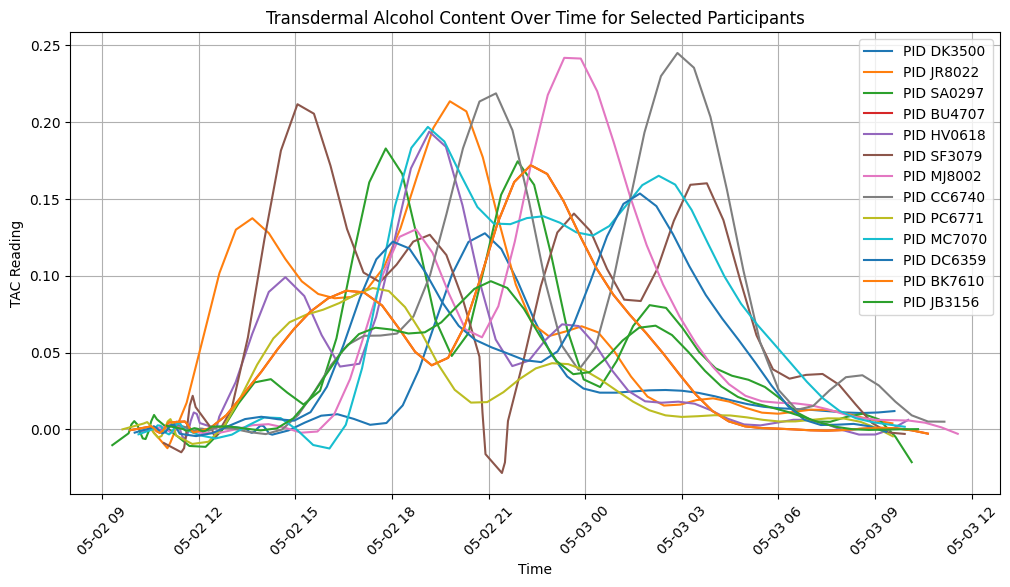

In [11]:
plt.figure(figsize=(12, 6))

participants = tac_data["pid"].unique()

for pid in participants:
    subset = tac_data[tac_data["pid"] == pid]
    plt.plot(subset["timestamp"], subset["TAC_Reading"], label=f"PID {pid}")

plt.xlabel("Time")
plt.ylabel("TAC Reading")
plt.title("Transdermal Alcohol Content Over Time for Selected Participants")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

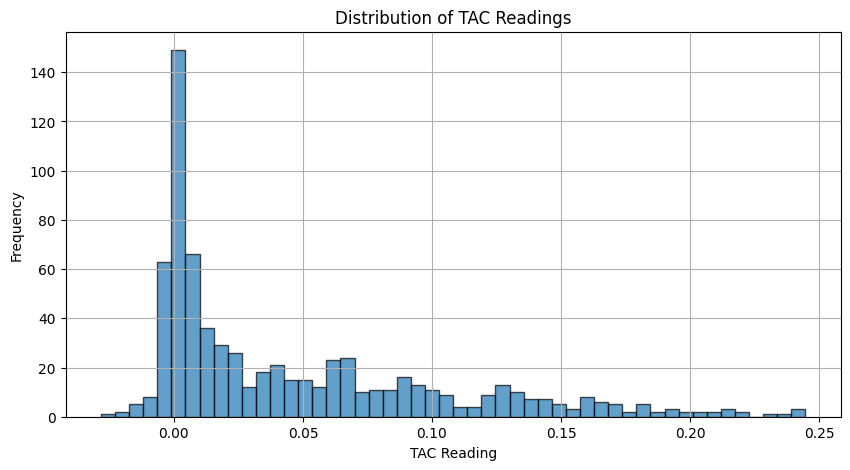

In [12]:
plt.figure(figsize=(10, 5))
plt.hist(tac_data["TAC_Reading"], bins=50, edgecolor="black", alpha=0.7)
plt.xlabel("TAC Reading")
plt.ylabel("Frequency")
plt.title("Distribution of TAC Readings")
plt.grid()
plt.show()